### Excercise 10
Train a deep MLP on the MNIST dataset (you can load it using tf.keras.​data⁠sets.mnist.load_data()). See if you can get over 98% accuracy by manually tuning the hyperparameters. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). Next, try tuning the hyperparameters using Keras Tuner with all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

(array([[5000.,    0.,    0., ...,    0.,    0.,    0.],
        [5000.,    0.,    0., ...,    0.,    0.,    0.],
        [5000.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [5000.,    0.,    0., ...,    0.,    0.,    0.],
        [5000.,    0.,    0., ...,    0.,    0.,    0.],
        [5000.,    0.,    0., ...,    0.,    0.,    0.]]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 784 BarContainer objects>)

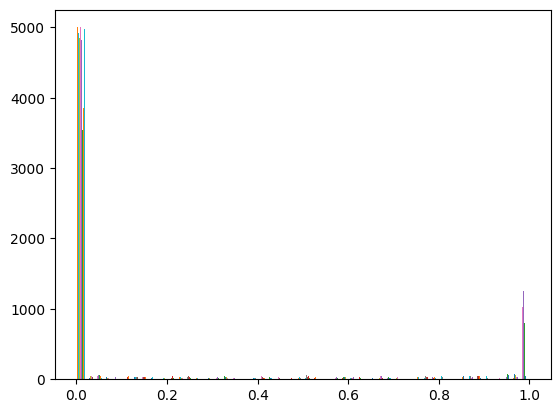

In [6]:
plt.hist(X_valid.reshape(5000, -1), bins=50)

In [8]:
np.mean(X_train), np.std(X_train)

(0.1307167506093348, 0.30819664165272803)

In [11]:
np.mean(X_train, axis=0)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        8.98395722e-06, 3.35115865e-05, 1.54010695e-05, 6.41711230e-07,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.14081996e-06, 3.92156863e-06, 3.97147950e-05, 9.86809269e-05,
        1.41818182e-04, 2.07985740e-04, 4.09982175e-04, 5.71978610e-04,
        6.28663102e-04, 6.40213904e-04, 7.15008913e-04, 6.78716578e-04,
        7.01105169e-04, 5.37754011e-04, 3.52014260e-04, 2.46844920e-04,
        2.08342246e-04, 9.06238859e-05, 4.31372549e-05, 1.51158645e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [13]:
np.std(X_train, axis=0)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.94688201e-03, 5.57530126e-03, 3.61183812e-03, 1.50493255e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.67543565e-04, 7.97210368e-04, 4.32121725e-03, 8.53981047e-03,
        1.03521454e-02, 1.18338348e-02, 1.75311134e-02, 2.06973457e-02,
        2.13554433e-02, 2.10812220e-02, 2.30466313e-02, 2.25100121e-02,
        2.30455722e-02, 2.00312209e-02, 1.64685665e-02, 1.33621591e-02,
        1.26134793e-02, 7.95653546e-03, 4.96112164e-03, 3.30366086e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

I think it would be good to use a Normalization layer

In [19]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(axis=(1, 2))
model = tf.keras.Sequential()
model.add(norm_layer)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="softplus"))
model.add(tf.keras.layers.Dense(100, activation="softplus"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, 
              metrics=["accuracy"])
norm_layer.adapt(X_train)  # must be called before model.fit()
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2445 - accuracy: 0.9299 - val_loss: 0.1301 - val_accuracy: 0.9644
Epoch 2/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1031 - accuracy: 0.9695 - val_loss: 0.1213 - val_accuracy: 0.9684
Epoch 3/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0739 - accuracy: 0.9769 - val_loss: 0.1127 - val_accuracy: 0.9708
Epoch 4/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0552 - accuracy: 0.9829 - val_loss: 0.1328 - val_accuracy: 0.9724
Epoch 5/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0475 - accuracy: 0.9857 - val_loss: 0.1286 - val_accuracy: 0.9754
Epoch 6/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0400 - accuracy: 0.9877 - val_loss: 0.1576 - val_accuracy: 0.9714
Epoch 7/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0398 - accuracy: 0.9886 - val_loss: 0.1344 - val_ac

Let's try without the Normalization layer:

In [20]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Input(shape=[28, 28]))  # without the batch size - only the shape of the instances
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(300, activation="softplus"))
model2.add(tf.keras.layers.Dense(100, activation="softplus"))
model2.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer2 = tf.keras.optimizers.legacy.Adam(learning_rate=1e-3)
model2.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer2, 
              metrics=["accuracy"])
history2 = model2.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3073 - accuracy: 0.9068 - val_loss: 0.1250 - val_accuracy: 0.9650
Epoch 2/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1304 - accuracy: 0.9601 - val_loss: 0.1095 - val_accuracy: 0.9662
Epoch 3/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0862 - accuracy: 0.9729 - val_loss: 0.0806 - val_accuracy: 0.9748
Epoch 4/20
1719/1719 [==============================] - 9s 6ms/step - loss: 0.0615 - accuracy: 0.9804 - val_loss: 0.0877 - val_accuracy: 0.9736
Epoch 5/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0449 - accuracy: 0.9857 - val_loss: 0.0780 - val_accuracy: 0.9796
Epoch 6/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0338 - accuracy: 0.9889 - val_loss: 0.0830 - val_accuracy: 0.9806
Epoch 7/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0268 - accuracy: 0.9911 - val_loss: 0.0856 - val_accura

It seems  we get better performance without the Normalization layer in this case.

Now let's try to tune the learning rate using the LearningRateScheduler callback.

In [22]:
def scheduler(epoch, lr):
    max = 10
    min = 1e-5
    n_epochs = 30
    factor = (max / min) ** (1 / n_epochs)
    return lr * factor


In [24]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))  # without the batch size - only the shape of the instances
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="softplus"))
model.add(tf.keras.layers.Dense(100, activation="softplus"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-5)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, 
              metrics=["accuracy"])
lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
history = model.fit(
    X_train, y_train, epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[lr_callback]
)


Epoch 1: LearningRateScheduler setting learning rate to 1.5848931524233436e-05.
Epoch 1/30
1719/1719 [==============================] - 10s 6ms/step - loss: 1.5155 - accuracy: 0.6374 - val_loss: 0.7276 - val_accuracy: 0.8688 - lr: 1.5849e-05

Epoch 2: LearningRateScheduler setting learning rate to 2.5118862961658603e-05.
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5457 - accuracy: 0.8643 - val_loss: 0.3409 - val_accuracy: 0.9158 - lr: 2.5119e-05

Epoch 3: LearningRateScheduler setting learning rate to 3.9810715050325415e-05.
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3723 - accuracy: 0.8959 - val_loss: 0.2674 - val_accuracy: 0.9272 - lr: 3.9811e-05

Epoch 4: LearningRateScheduler setting learning rate to 6.309573111472314e-05.
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3187 - accuracy: 0.9088 - val_loss: 0.2332 - val_accuracy: 0.9342 - lr: 6.3096e-05

Epoch 5: LearningRateScheduler

Text(0, 0.5, 'Loss')

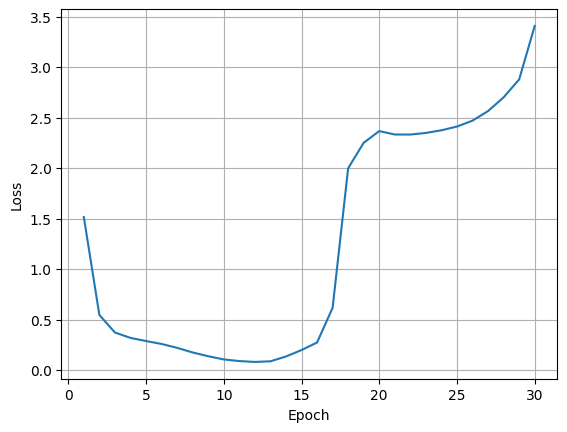

In [28]:
plt.plot(np.arange(1, 31), history.history['loss'])
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')

The loss starts to climb back around Epoch 13. From the training logs we can find out the learning rate on that epoch:
```
Epoch 13: LearningRateScheduler setting learning rate to 0.003981071308995074.
Epoch 13/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0869 - accuracy: 0.9733 - val_loss: 0.0832 - val_accuracy: 0.9746 - lr: 0.0040
```
So let's use half of that, `0.002`

In [29]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs/exercises/"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()
run_logdir

PosixPath('my_logs/exercises/run_2024_04_04_12_51_36')

In [31]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))  # without the batch size - only the shape of the instances
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="softplus"))
model.add(tf.keras.layers.Dense(100, activation="softplus"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimal_learning_rate = 0.002
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.002)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, 
              metrics=["accuracy"])
es_callback = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
cp_callback = tf.keras.callbacks.ModelCheckpoint("my_exercise_checkpoints", save_best_only=True)
tb_callback = tf.keras.callbacks.TensorBoard(get_run_logdir())
history = model.fit(
    X_train, y_train, epochs=50,
    validation_data=(X_valid, y_valid),
    callbacks=[es_callback, cp_callback, tb_callback]
)

Epoch 1/50
1719/1719 [==============================] - ETA: 0s - loss: 0.2489 - accuracy: 0.9227INFO:tensorflow:Assets written to: my_exercise_checkpoints/assets


INFO:tensorflow:Assets written to: my_exercise_checkpoints/assets


1719/1719 [==============================] - 10s 6ms/step - loss: 0.2489 - accuracy: 0.9227 - val_loss: 0.1024 - val_accuracy: 0.9682
Epoch 2/50
1710/1719 [============================>.] - ETA: 0s - loss: 0.1009 - accuracy: 0.9696INFO:tensorflow:Assets written to: my_exercise_checkpoints/assets


INFO:tensorflow:Assets written to: my_exercise_checkpoints/assets


1719/1719 [==============================] - 9s 5ms/step - loss: 0.1009 - accuracy: 0.9695 - val_loss: 0.0955 - val_accuracy: 0.9712
Epoch 3/50
1717/1719 [============================>.] - ETA: 0s - loss: 0.0688 - accuracy: 0.9782INFO:tensorflow:Assets written to: my_exercise_checkpoints/assets


INFO:tensorflow:Assets written to: my_exercise_checkpoints/assets


1719/1719 [==============================] - 9s 5ms/step - loss: 0.0688 - accuracy: 0.9782 - val_loss: 0.0728 - val_accuracy: 0.9808
Epoch 4/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0485 - accuracy: 0.9846 - val_loss: 0.0898 - val_accuracy: 0.9752
Epoch 5/50
1715/1719 [============================>.] - ETA: 0s - loss: 0.0380 - accuracy: 0.9877INFO:tensorflow:Assets written to: my_exercise_checkpoints/assets


INFO:tensorflow:Assets written to: my_exercise_checkpoints/assets


1719/1719 [==============================] - 9s 5ms/step - loss: 0.0379 - accuracy: 0.9878 - val_loss: 0.0697 - val_accuracy: 0.9820
Epoch 6/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0312 - accuracy: 0.9905 - val_loss: 0.1092 - val_accuracy: 0.9764
Epoch 7/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0265 - accuracy: 0.9918 - val_loss: 0.0982 - val_accuracy: 0.9782
Epoch 8/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0232 - accuracy: 0.9925 - val_loss: 0.0990 - val_accuracy: 0.9814
Epoch 9/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0210 - accuracy: 0.9933 - val_loss: 0.1431 - val_accuracy: 0.9730
Epoch 10/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0192 - accuracy: 0.9938 - val_loss: 0.1268 - val_accuracy: 0.9806
Epoch 11/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0185 - accuracy: 0.9949 - val_loss: 0.1282 - val_accuracy: 0.9802
E

In [32]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.0770 - accuracy: 0.9813


[0.07695230096578598, 0.9812999963760376]

Hooray, we get over 98% accuracy! 

Now let's use keras tuner to tune the hyperparameters.

In [44]:
import keras_tuner as kt

class MyClassificationHyperModel(kt.HyperModel):

    def build(self, hp: kt.HyperParameters) -> tf.keras.Model:
        n_hidden = hp.Int("n_hidden", min_value=1, max_value=8, default=2)
        n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
        learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
        optimizer = hp.Choice("optimizer", values=["sgd", "Adam"])
        if optimizer == "sgd":
            optimizer = tf.keras.optimizers.legacy.SGD()
        else:
            optimizer = tf.keras.optimizers.legacy.Adam()

        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Flatten())
        for _ in range(n_hidden):
            model.add(tf.keras.layers.Dense(n_neurons, activation="softplus"))
        model.add(tf.keras.layers.Dense(10, activation="softmax"))
        model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
        return model
    
    def fit(self, hp: kt.HyperParameters, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            norm_layer.adapt(X)
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

In [45]:
random_search_tuner = kt.RandomSearch(
    MyClassificationHyperModel(), objective="val_accuracy", max_trials=5, overwrite=True,
    directory="exercise_mnist", project_name="my_rnd_search", seed=42
)
root_logdir = Path(random_search_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid),
                           callbacks=[tensorboard_cb, early_stopping_cb])

Trial 5 Complete [00h 02m 02s]
val_accuracy: 0.9527999758720398

Best val_accuracy So Far: 0.9782000184059143
Total elapsed time: 00h 11m 46s


In [47]:
best_params = random_search_tuner.get_best_hyperparameters()[0]
best_params.values

{'n_hidden': 2,
 'n_neurons': 251,
 'learning_rate': 0.001715074355925934,
 'optimizer': 'Adam',
 'normalize': False}

In [48]:
best_model = random_search_tuner.get_best_models()[0]
best_model.fit(X_train_full, y_train_full, epochs=10)
best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 4.5526 - accuracy: 0.9698
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4304 - accuracy: 0.9696
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3333 - accuracy: 0.9660
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2426 - accuracy: 0.9623
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2331 - accuracy: 0.9632
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2124 - accuracy: 0.9633
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1657 - accuracy: 0.9675
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1523 - accuracy: 0.9705
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1420 - accuracy: 0.9718
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss

[1.9243015050888062, 0.304500013589859]

Wtf???